<a href="https://colab.research.google.com/github/batmac/google.colab/blob/main/OWLv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## OWLV2: Scaling Open-Vocabulary Object Detection

This notebook shows you how to use OWLv2 for open-vocabulary object detection.

Let's import the necessary libraries first.

In [ ]:
import requests
from PIL import Image
import torch
from transformers import Owlv2Processor, Owlv2ForObjectDetection, pipeline

Let's see how we can infer using zero-shot object detection pipeline first. It's the easiest way to do inference.

Initialize the pipeline.

In [ ]:
checkpoint = "google/owlv2-large-patch14-finetuned"

In [ ]:
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.75G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/121 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/427 [00:00<?, ?B/s]

Simply get the image and pass that and the candidate labels to the detector.

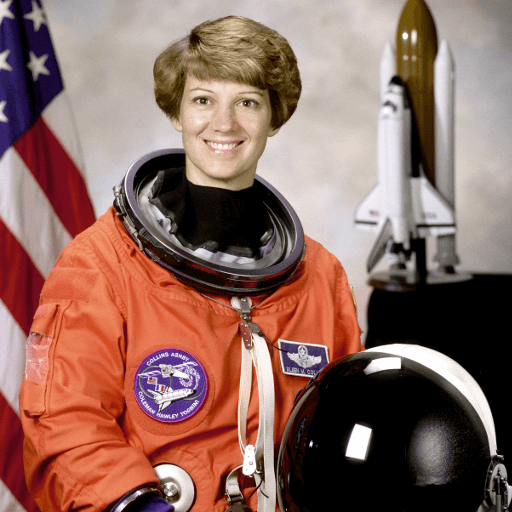

In [ ]:
url = "https://cdn-lfs.huggingface.co/datasets/huggingface/documentation-images/1437fe00f99a778e9d36f81aaab3eaaa65c333501fad313ef49dabe57638cc5d?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27zero-sh-obj-detection_1.png%3B+filename%3D%22zero-sh-obj-detection_1.png%22%3B&response-content-type=image%2Fpng&Expires=1705945774&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwNTk0NTc3NH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9kYXRhc2V0cy9odWdnaW5nZmFjZS9kb2N1bWVudGF0aW9uLWltYWdlcy8xNDM3ZmUwMGY5OWE3NzhlOWQzNmY4MWFhYWIzZWFhYTY1YzMzMzUwMWZhZDMxM2VmNDlkYWJlNTc2MzhjYzVkP3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiZyZXNwb25zZS1jb250ZW50LXR5cGU9KiJ9XX0_&Signature=gPPT0oe7A2GIWHB3LVKuVajiWfVx9wMDh0OwaWqlTCe-o-18oBePGiIFTA53NFKOr7InnnvLzEc9rqJG9XheV9nJ8MK9Wfw3GYCVhAtZucPlSUrD5KugyTRORtmUf3TI0hKZkcV0ZKPV31NziNOdrOyH50oxR8v7%7E4VBoPATFcUtFJYCsQaVArM5z9OCs5qruUNLCKwxsBFifbjtxqmYcXMpB2nm5Fw-WEun-NjdiM7NiDQ6HWiAiH80mg%7EeA16dPAmkH7iPXxho0d5njtea3mQNEdQ5If3NkToXpLVVwGAD-CfOKxaZoNm6s9cDUL1sg-IJ8R4WRLiIthXug8yx-g__&Key-Pair-Id=KVTP0A1DKRTAX"
image = Image.open(requests.get(url, stream=True).raw)
display(image)

In [ ]:
predictions = detector(
    image,
    candidate_labels=["human face", "rocket", "nasa badge", "star-spangled banner"],
)
predictions

[{'score': 0.6943218111991882,
  'label': 'nasa badge',
  'box': {'xmin': 134, 'ymin': 348, 'xmax': 208, 'ymax': 422}},
 {'score': 0.6000555753707886,
  'label': 'nasa badge',
  'box': {'xmin': 278, 'ymin': 339, 'xmax': 329, 'ymax': 377}},
 {'score': 0.42687639594078064,
  'label': 'star-spangled banner',
  'box': {'xmin': 1, 'ymin': 1, 'xmax': 99, 'ymax': 506}},
 {'score': 0.3495982885360718,
  'label': 'nasa badge',
  'box': {'xmin': 23, 'ymin': 332, 'xmax': 52, 'ymax': 385}},
 {'score': 0.32192254066467285,
  'label': 'rocket',
  'box': {'xmin': 357, 'ymin': 2, 'xmax': 471, 'ymax': 291}},
 {'score': 0.2186298817396164,
  'label': 'rocket',
  'box': {'xmin': 432, 'ymin': 39, 'xmax': 456, 'ymax': 211}},
 {'score': 0.2000228762626648,
  'label': 'nasa badge',
  'box': {'xmin': 295, 'ymin': 418, 'xmax': 307, 'ymax': 450}},
 {'score': 0.1850745975971222,
  'label': 'rocket',
  'box': {'xmin': 379, 'ymin': 41, 'xmax': 395, 'ymax': 102}},
 {'score': 0.18441838026046753,
  'label': 'rocket'

Visualize the output.

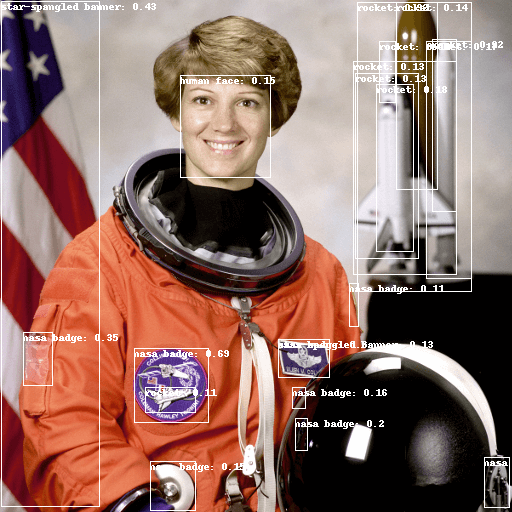

In [ ]:
from PIL import ImageDraw
img = image.convert('RGB')
draw = ImageDraw.Draw(image)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]

    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}")

image

If you'd like to play around with the model on a lower level, we also demonstrate how to use `Owlv2` model and processor below. Let's initialize them with our checkpoint.

In [ ]:
processor = Owlv2Processor.from_pretrained(checkpoint)
model = Owlv2ForObjectDetection.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


We can pass the text and the image to processor first and get the output.

In [ ]:
image = image.convert("RGB")
texts = [["human face", "rocket", "nasa badge", "star-spangled banner"]]
inputs = processor(text=texts, images=image, return_tensors="pt")
outputs = model(**inputs)

We can now rescale the box predictions, convert the outputs, get the best matching query and display.

In [ ]:
target_sizes = torch.Tensor([image.size[::-1]])

results = processor.post_process_object_detection(outputs=outputs, threshold=0.1, target_sizes=target_sizes)

i = 0
text = texts[i]
boxes, scores, labels = results[i]["boxes"], results[i]["scores"], results[i]["labels"]

for box, score, label in zip(boxes, scores, labels):
    box = [round(i, 2) for i in box.tolist()]
    print(f"Detected {text[label]} with confidence {round(score.item(), 3)} at location {box}")


Detected rocket with confidence 0.144 at location [396.59, 2.33, 437.92, 189.23]
Detected rocket with confidence 0.185 at location [379.54, 41.45, 395.6, 102.84]
Detected rocket with confidence 0.219 at location [432.22, 39.43, 456.07, 211.49]
Detected human face with confidence 0.154 at location [180.33, 75.55, 270.51, 177.06]
Detected rocket with confidence 0.184 at location [376.47, 84.83, 413.22, 251.02]
Detected rocket with confidence 0.126 at location [353.66, 61.1, 456.1, 274.51]
Detected rocket with confidence 0.322 at location [357.35, 2.91, 471.39, 291.73]
Detected rocket with confidence 0.132 at location [355.47, 73.21, 418.25, 258.17]
Detected rocket with confidence 0.172 at location [426.34, 41.27, 471.52, 278.52]
Detected star-spangled banner with confidence 0.427 at location [1.26, 1.82, 99.81, 506.72]
Detected nasa badge with confidence 0.112 at location [349.55, 283.92, 358.97, 326.6]
Detected nasa badge with confidence 0.35 at location [23.81, 332.08, 52.37, 385.31]
D